# PRACTICAL No.5
## **`[DEPTH FIRST SEARCH]`**

### 1.Write a Program to Implement Depth First Search without goal state using Python.


In [ ]:
# dfs without goal state
from collections import deque

def depth_first_search(graph, start):
    visited = set()
    stack = deque([start])  # Use deque as a stack
    search_order = []

    while stack:
        # Pop the last element from the stack
        current_vertex = stack.pop()
        if current_vertex not in visited:
            visited.add(current_vertex)
            search_order.append(current_vertex)

            # Add neighbors in reverse order to maintain DFS order
            for neighbor in reversed(graph[current_vertex]):
                if neighbor not in visited:
                    stack.append(neighbor)

    return search_order

# Driver code
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': ['H'],
    'F': [],
    'G': [],
    'H': []
}

start_node = 'A'
dfs_order = depth_first_search(graph, start_node)
print("DFS Traversal Order:", dfs_order)

DFS Traversal Order: ['A', 'B', 'D', 'E', 'H', 'C', 'F', 'G']


### 2.Write a Program to Implement Depth First Search with goal state using Python.

In [2]:
# dfs with goal state
from collections import deque

def depth_first_search_with_goal(graph, start, goal):
    visited = set()
    stack = deque([start])  # Use deque as a stack

    while stack:
        current_vertex = stack.pop()  # Pop the last element from the stack
        print(f"Visiting: {current_vertex}")

        if current_vertex == goal:
            print(f"Goal state '{goal}' reached!")
            return True

        if current_vertex not in visited:
            visited.add(current_vertex)

            # Add neighbors in reverse order to maintain DFS order
            for neighbor in reversed(graph[current_vertex]):
                if neighbor not in visited:
                    stack.append(neighbor)

    print(f"Goal state '{goal}' not found.")
    return False
# Driver code
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': ['H'],
    'F': [],
    'G': [],
    'H': []
}

start_node = 'A'
goal_node = 'H'

found = depth_first_search_with_goal(graph, start_node, goal_node)

if found:
    print("DFS successfully found the goal.")
else:
    print("DFS could not find the goal.")

Visiting: A
Visiting: B
Visiting: D
Visiting: E
Visiting: H
Goal state 'H' reached!
DFS successfully found the goal.


# PRACTICAL No.6 

## **`[UNIFORM COST SEARCH]`**

### 1.Write a Program to Implement Uniform-cost Search using Python.

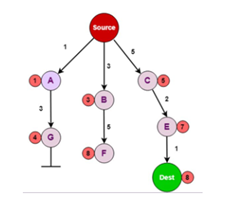

In [4]:
from queue import PriorityQueue

def uniform_cost_search(graph, start, goal):


    frontier = PriorityQueue()
    frontier.put((0, start))  # Priority queue: (cost, node)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()[1]  # Get the node with the lowest cost

        if current == goal:
            break

        for next in graph[current].keys():
            new_cost = cost_so_far[current] + graph[current][next]
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost
                frontier.put((priority, next))
                came_from[next] = current

    # Reconstruct the path
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()

    return path, cost_so_far[goal]

# Driver code
graph = {
    'Source': {'A': 1, 'C': 5},
    'A': {'B': 3, 'G': 3},
    'B': {'F': 5},
    'C': {'E': 2},
    'E': {'Dest': 1},
    'G': {},
    'F': {},
    'Dest': {}
}
start = 'Source'
goal = 'Dest'

path, cost = uniform_cost_search(graph, start, goal)

print("Path:", path)
print("Cost:", cost)

Path: ['Source', 'C', 'E', 'Dest']
Cost: 8


### 2.Write a Program to Implement Uniform-cost Search using Python.

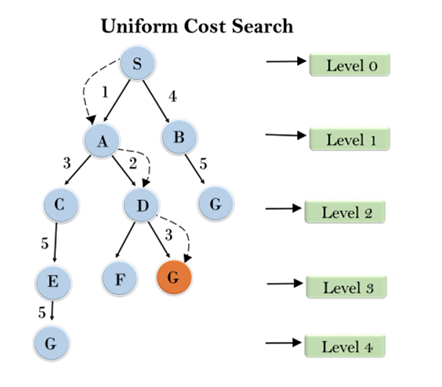

In [3]:
from queue import PriorityQueue

def uniform_cost_search(graph, start, goal):


    frontier = PriorityQueue()
    frontier.put((0, start))  # Priority queue: (cost, node)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()[1]  #lowest cost

        if current == goal:
            break

        for next in graph[current].keys():
            new_cost = cost_so_far[current] + graph[current][next]
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost
                frontier.put((priority, next))
                came_from[next] = current

    # path
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()

    return path, cost_so_far[goal]

# driver code
graph = {
    'S': {'A': 1, 'B': 4},
    'A': {'C': 3, 'D': 2},
    'B': {'G': 5},
    'C': {'E': 5},
    'D': {'F': 3, 'G': 3},
    'E': {'G': 5},
    'F': {},
    'G': {}
}
start_node = 'S'
goal_node = 'G'

path, cost = uniform_cost_search(graph, start_node, goal_node)

print("Path:", path)
print("Cost:", cost)

Path: ['S', 'A', 'D', 'G']
Cost: 6


# PRACTICAL No.7 

## **`BEST FIRST SEARCH`**

### 1.Write a Program to Implement Best First Search without goal state using Python.


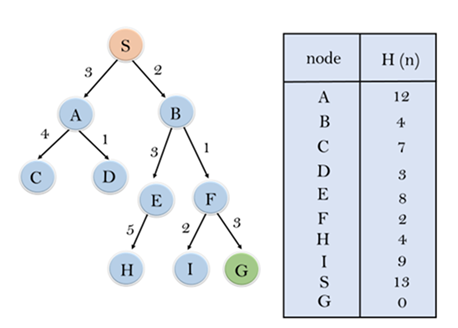

In [4]:
from queue import PriorityQueue

def best_first_search(graph, start, heuristic):

    frontier = PriorityQueue()
    frontier.put((heuristic[start], start))  # Priority queue: (heuristic value, node)
    visited = set()
    visited.add(start)
    search_order = [start]

    while not frontier.empty():
        current = frontier.get()[1]  #lowest heuristic value

        for next in graph[current].keys():
            if next not in visited:
                visited.add(next)
                frontier.put((heuristic[next], next))
                search_order.append(next)

    return search_order

# Driver code
graph = {
    'S': {'A': 3, 'B': 2},
    'A': {'C': 4, 'D': 1},
    'B': {'E': 9, 'F': 1},
    'C': {},
    'D': {},
    'E': {'H': 5, 'I': 2},
    'F': {'G': 3},
    'G': {},
    'H': {},
    'I': {}
}

heuristic = {
    'A': 12,
    'B': 4,
    'C': 7,
    'D': 8,
    'E': 2,
    'F': 8,
    'G': 0,
    'H': 4,
    'I': 9,
    'S': 18
}

start_node = 'S'

search_order = best_first_search(graph, start_node, heuristic)

print("Search Order:", search_order)

Search Order: ['S', 'A', 'B', 'E', 'F', 'H', 'I', 'G', 'C', 'D']


# PRACTICAL No.8 

## **`A* SEARCH`**

### 1.Write a Program to Implement A* Search using Python.


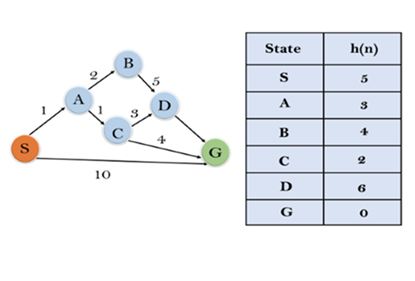  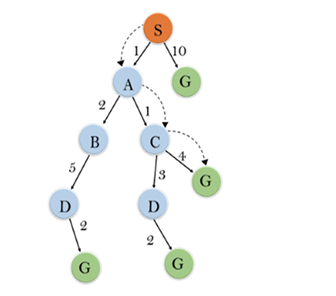



In [5]:
from queue import PriorityQueue

def a_star_search(graph, start, goal, heuristic):


    frontier = PriorityQueue()
    frontier.put((heuristic[start], start))  # Priority queue: (f_score, node)
    came_from = {}
    g_score = {}  # Cost from start to current node
    came_from[start] = None
    g_score[start] = 0

    while not frontier.empty():
        current = frontier.get()[1]  #  the lowest f_score

        if current == goal:
            break

        for next in graph[current].keys():
            tentative_g_score = g_score[current] + graph[current][next]
            if next not in g_score or tentative_g_score < g_score[next]:
                came_from[next] = current
                g_score[next] = tentative_g_score
                f_score = g_score[next] + heuristic[next]
                frontier.put((f_score, next))

    # path
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()

    return path, g_score[goal]

# driver code
graph = {
    'S': {'A': 2, 'B': 10},
    'A': {'C': 1, 'D': 3},
    'B': {},
    'C': {'D': 4, 'G': 10},
    'D': {'G': 2},
    'G': {}
}

heuristic = {
    'S': 5,
    'A': 3,
    'B': 4,
    'C': 6,
    'D': 2,
    'G': 0
}

start_node = 'S'
goal_node = 'G'

path, cost = a_star_search(graph, start_node, goal_node, heuristic)

print("Path:", path)
print("Cost:", cost)

Path: ['S', 'A', 'D', 'G']
Cost: 7
